<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/NBA_Players_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('sample_data/players')

In [3]:
path.ls()

[PosixPath('sample_data/players/russell'),
 PosixPath('sample_data/players/models'),
 PosixPath('sample_data/players/steph'),
 PosixPath('sample_data/players/kawhi'),
 PosixPath('sample_data/players/lebron'),
 PosixPath('sample_data/players/klay'),
 PosixPath('sample_data/players/.ipynb_checkpoints')]

In [4]:
folders = ['kawhi','steph', 'klay', 'russell', 'lebron']
files = ['kawhi_urls','steph_urls.txt', 'klay_urls.txt', 'russell_urls.txt', 'lebron_urls.txt']

In [16]:
for i in range(0,5):
  path = Path('sample_data/players')
  folder = folders[i]
  file = files[i]
  dest = path/folder
  download_images(path/folder/file, dest)

In [5]:
classes = ['kawhi','steph', 'klay', 'russell', 'lebron']

for c in classes:
  verify_images(path/c, delete=True, max_size=500)

In [6]:
np.random.seed(42)

In [29]:
if data:
  del data

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

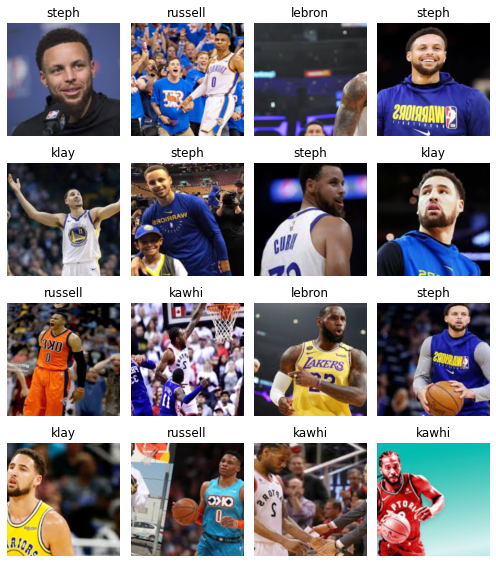

In [30]:
data.show_batch(4, figsize=(7,8))

In [31]:
data.classes

['kawhi', 'klay', 'lebron', 'russell', 'steph']

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['kawhi', 'klay', 'lebron', 'russell', 'steph'], 5, 1088, 272)

Create the model

In [33]:
if learn:
  del learn
learn = cnn_learner(data, base_arch=models.resnet34, metrics=error_rate)

In [34]:
learn.data

ImageDataBunch;

Train: LabelList (1088 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
russell,russell,russell,russell,russell
Path: sample_data/players;

Valid: LabelList (272 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
russell,klay,klay,steph,klay
Path: sample_data/players;

Test: None

In [35]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.319645,1.408509,0.488971,00:17
1,1.792251,1.303298,0.459559,00:16
2,1.517082,1.093392,0.400735,00:16
3,1.289163,1.055452,0.382353,00:16


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [20]:
learn.save('stage_1')

In [21]:
learn.unfreeze()

In [36]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


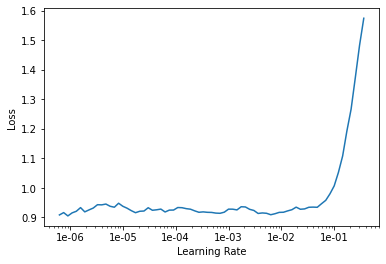

In [37]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(8, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.998811,1.103611,0.411765,00:17
1,0.972511,1.220746,0.367647,00:17
2,1.000826,1.088022,0.389706,00:17
3,0.984312,1.119972,0.371324,00:17
4,0.917140,1.069373,0.360294,00:17
5,0.834051,0.941911,0.334559,00:16
6,0.768883,0.919950,0.334559,00:16
7,0.703956,0.916015,0.334559,00:17


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [39]:
learn.save('stage-2')

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

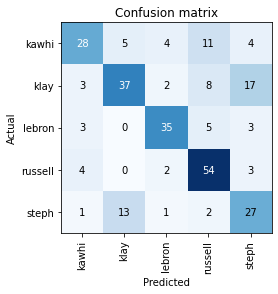

In [41]:
interp.plot_confusion_matrix()